# 정규 방정식을 사용한 선형 회귀

In [1]:
import numpy as np

np.random.seed(42)

# 데이터를 임의로 만든다
# 랜덤함수를 사용하여 시드를 설정한다
# 유사난수

In [7]:
np.random.rand(100, 1)

array([[0.7948113 ],
       [0.50263709],
       [0.57690388],
       [0.49251769],
       [0.19524299],
       [0.72245212],
       [0.28077236],
       [0.02431597],
       [0.6454723 ],
       [0.17711068],
       [0.94045858],
       [0.95392858],
       [0.91486439],
       [0.3701587 ],
       [0.01545662],
       [0.92831856],
       [0.42818415],
       [0.96665482],
       [0.96361998],
       [0.85300946],
       [0.29444889],
       [0.38509773],
       [0.85113667],
       [0.31692201],
       [0.16949275],
       [0.55680126],
       [0.93615477],
       [0.6960298 ],
       [0.57006117],
       [0.09717649],
       [0.61500723],
       [0.99005385],
       [0.14008402],
       [0.51832965],
       [0.87737307],
       [0.74076862],
       [0.69701574],
       [0.70248408],
       [0.35949115],
       [0.29359184],
       [0.80936116],
       [0.81011339],
       [0.86707232],
       [0.91324055],
       [0.5113424 ],
       [0.50151629],
       [0.79829518],
       [0.649

In [8]:
np.random.randn(100, 1) 

array([[ 1.26691115],
       [-0.70766947],
       [ 0.44381943],
       [ 0.77463405],
       [-0.92693047],
       [-0.05952536],
       [-3.24126734],
       [-1.02438764],
       [-0.25256815],
       [-1.24778318],
       [ 1.6324113 ],
       [-1.43014138],
       [-0.44004449],
       [ 0.13074058],
       [ 1.44127329],
       [-1.43586215],
       [ 1.16316375],
       [ 0.01023306],
       [-0.98150865],
       [ 0.46210347],
       [ 0.1990597 ],
       [-0.60021688],
       [ 0.06980208],
       [-0.3853136 ],
       [ 0.11351735],
       [ 0.66213067],
       [ 1.58601682],
       [-1.2378155 ],
       [ 2.13303337],
       [-1.9520878 ],
       [-0.1517851 ],
       [ 0.58831721],
       [ 0.28099187],
       [-0.62269952],
       [-0.20812225],
       [-0.49300093],
       [-0.58936476],
       [ 0.8496021 ],
       [ 0.35701549],
       [-0.6929096 ],
       [ 0.89959988],
       [ 0.30729952],
       [ 0.81286212],
       [ 0.62962884],
       [-0.82899501],
       [-0

In [2]:
X = 2 * np.random.rand(100, 1)  # 특성 축
# rand()라는 것은 표준정규분포를 따르는 dataset을 가져다준다.

y = 4 + 3 * X + np.random.randn(100, 1)  # y 는 타깃 축

#y= 4+3x+가우시안 노이즈

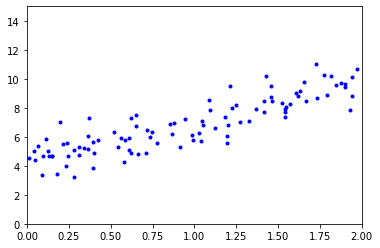

In [9]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* 넘파이 선형 대수 모듈 이용

In [12]:
X.shape

(100, 1)

In [14]:
X_b.shape

(100, 2)

In [15]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [17]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
# np.c_ 는 열 병합이라는 뜻이다. 옆으로 나란히 붙게된다.

# 선형 회귀 예측 중 정규 방정식을 구현한 것이다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [20]:
# 최적의 세타값
theta_best

# 출력 값의 앞의 4.2는 절편, 2.7은 기울기

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

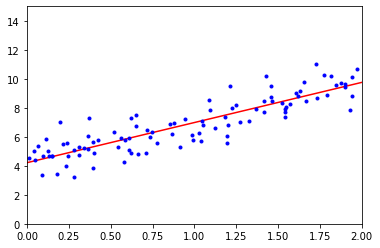

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* 사이킷런 이용

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
np.sum(np.square(lin_reg.predict(X)-y)) #오차 제곱의 합

80.65845639670533

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
lin_reg.score(X,y) #R2

0.7692735413614223

In [12]:
from sklearn.metrics.scorer import SCORERS
print("가능한 평가 방식:\n{}".format(sorted(SCORERS.keys())))

가능한 평가 방식:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


C:\Users\mue\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# 경사 하강법을 사용한 선형 회귀

In [13]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 새 샘플에 x0 = 1을 추가

In [14]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

# 확률적 경사 하강법

In [17]:
m = len(X_b)
np.random.seed(42)

In [18]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1) #0.1에서부터 t가 커질수록 줄어듬

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] #100개중 하나의 샘플만 추출
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)  
        theta = theta - eta * gradients

In [19]:
theta

array([[4.21076011],
       [2.74856079]])

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# 다항 회귀

In [22]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [23]:
import matplotlib.pyplot as plt

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

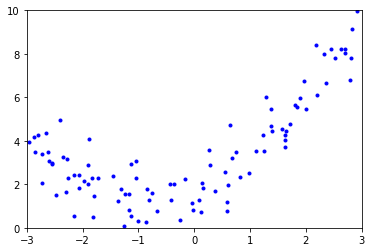

In [25]:
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(poly_features.get_feature_names())

['x0', 'x0^2']


In [27]:
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

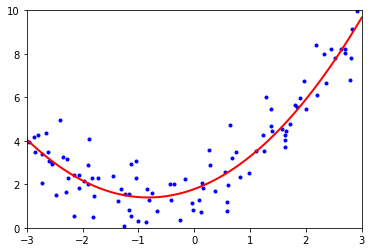

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predict")
plt.axis([-3, 3, 0, 10])
plt.show()

# 규제가 있는 모델

## 릿지 회귀

In [33]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [35]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 라쏘 회귀

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## 엘라스틱넷

In [37]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])